# Data Transforms
- Rescale Data
- Standardize Data
- Normalize Data
- Binarize Data

# Rescale Data

In [2]:
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
from pandas import read_csv
filename = 'data/diabetes.csv'

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values[1:]
X = array[:, 0:8]
X
Y = array[:, 8]
Y
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX =scaler.fit_transform(X)
set_printoptions(precision=2)
print(rescaledX[0: 5, :])

[[0.35 0.74 0.59 0.35 0.   0.5  0.23 0.48]
 [0.06 0.43 0.54 0.29 0.   0.4  0.12 0.17]
 [0.47 0.92 0.52 0.   0.   0.35 0.25 0.18]
 [0.06 0.45 0.54 0.23 0.11 0.42 0.04 0.  ]
 [0.   0.69 0.33 0.35 0.2  0.64 0.94 0.2 ]]


# Standardize Data

In [16]:
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names = names)
array = dataframe.values[1:]
X = array[: , 0:8]
Y = array[:, 8]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
set_printoptions(precision=3)
print(rescaledX[0:5,:])


[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


### The values for each attribute now have a mean value of 0 and a standard deviation of 1

# Normalize Data

#### Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called a unit norm or a vector with the length of 1 in linear algebra). This pre-processing method can be useful for sparse datasets (lots of zeros) with attributes of varying scales when using algorithms that weight input values such as neural networks and algorithms that use distancemeasures such as k-Nearest Neighbors.

In [3]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.preprocessing import Normalizer

filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

dataframe = read_csv(filename, names=names)
array = dataframe.values[1:]
X = array[:, 0:8]
Y = array[:, 8]
scalerX = Normalizer().fit(X)
rescaledX = scalerX.transform(X)
set_printoptions(precision=3)
print(rescaledX[0:5, :])


[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


# Binarize Data (Make Binary)

### You can transform your data using a binary threshold. All values above the threshold are marked 1 and all equal to or below are marked as 0. This is called binarizing your data or thresholding your data. It can be useful when you have probabilities that you want to make crisp values. It is also useful when feature engineering and you want to add new features that indicate something meaningful.

In [4]:
from numpy import set_printoptions
from sklearn.preprocessing import Binarizer
from pandas import read_csv
filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values[1:]
X = array[:, 0: 8]
Y = array[:, 8]
scalerX =Binarizer(threshold=0.0).fit(X)
rescaledX =scalerX.transform(X)
set_printoptions(precision=3)
print(rescaledX[0:5, :])

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


# Feature Selection

### The data features that you use to train your machine learning models have a huge influence on the performance you can achieve. Irrelevant or partially relevant features can negatively impact model performanc

- Univariate Selection.
- Recursive Feature Elimination.
- Principle Component Analysis.
- Feature Importance.

# Univariate Selection

In [5]:
from sklearn.feature_selection import SelectKBest, chi2
from pandas import read_csv
from numpy import set_printoptions
filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)

array = dataframe.values[1:]
X = array[:, 0:8]
Y = array[:, 8]
test =SelectKBest(score_func=chi2, k =4)
fit = test.fit(X, Y)
select_features_indices = fit.get_support(indices=True)
names = [names[i] for i in select_features_indices]
print(names)
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
print(features[0:5, :])


['plas', 'test', 'mass', 'age']
[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[['148' '0' '33.6' '50']
 ['85' '0' '26.6' '31']
 ['183' '0' '23.3' '32']
 ['89' '94' '28.1' '21']
 ['137' '168' '43.1' '33']]


# Recursive Feature Elimination

In [6]:
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)

array = dataframe.values[1:]
X = array[:, 0:8]
Y = array[:, 8]
model =LogisticRegression()
rfe = RFE(model)
fit = rfe.fit(X, Y)
select_features_indices = fit.get_support(indices=True)
names = [names[i] for i in select_features_indices]
print(names)
print("Num Features:", fit.n_features_)
print('Select Features:', fit.support_)
print('Features Ranking:', fit.ranking_)

['preg', 'plas', 'mass', 'pedi']
Num Features: 4
Select Features: [ True  True False False False  True  True False]
Features Ranking: [1 1 3 4 5 1 1 2]


# Principal Component Analysis


In [7]:
from pandas import read_csv
from sklearn.decomposition import PCA
filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)

array = dataframe.values[1:]
X = array[:, 0:8]
Y = array[:, 8]
pca =PCA(n_components=3)
fit = pca.fit(X)
print("Explained Variance:", fit.explained_variance_ratio_)
print('.................................')
print(fit.components_)

Explained Variance: [0.889 0.062 0.026]
.................................
[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


# Feature Importance

In [8]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
# load data
filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values[1:]
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.111 0.227 0.101 0.078 0.077 0.142 0.117 0.146]


# Evaluate Machine Learning Algorithms

- Train and Test Sets.
- k-fold Cross Validation.
- Leave One Out Cross Validation.
- Repeated Random Test-Train Splits.

### Split into Train and Test Sets

In [9]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from numpy import set_printoptions
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)

array = dataframe.values[1:]
X = array[:, 0:8]
Y = array[:, 8]
test_size = .33
seeds = 7
train_X,test_X, train_Y, test_Y =train_test_split(X, Y, test_size=test_size, random_state=seeds)
model = LogisticRegression()
model.fit(train_X, train_Y)
set_printoptions(precision=3)
result = model.score(test_X, test_Y)
accuracy = "accuracy: {:.3g}".format(result * 100)
print(accuracy)


accuracy: 78.7


### K-fold Cross Validation

In [10]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)

array = dataframe.values[1:]
X = array[:, 0:8]
Y = array[:, 8]
test_size = .33
seed = 7
num_folds = 10
kfold = KFold(n_splits=num_folds, random_state=None)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
accuracy_mean = "{:.3g}".format(results.mean()*100.0)
accuracy_std = "{:.3g}".format(results.std()*100.0)
print("Accuracy: Mean: {} std: {}".format(accuracy_mean, accuracy_std))

Accuracy: Mean: 76.8 std: 5.19


### Leave One Out Cross Validation

In [11]:
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)

array = dataframe.values[1:]
X = array[:, 0:8]
Y = array[:, 8]
num_folds = 10
loocv = LeaveOneOut()
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=loocv)
print("Accuracy: mean: {}, std: {}".format(results.mean()*100.0, results.std()*100.0))

Accuracy: mean: 77.86458333333334, std: 41.51584029812865


### Repeated Random Test-Train Splits

In [10]:
from pandas import read_csv
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)

array = dataframe.values[1:]
X = array[:, 0:8]
Y = array[:, 8]
num_folds = 10
n_splits = 10
test_size = 0.33
seed = 7
kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy=> mean: {:.3f}, std: {:.3f}".format(results.mean()*100.0, results.std()*100.0))

Accuracy=> mean: 77.087, std: 2.929


## Algorithm Evaluation Metrics

### Classification Metrics
- Classification Accuracy.
- Logarithmic Loss.
- Area Under ROC Curve.
- Confusion Matrix.
- Classification Report.

##  Classification Accuracy

In [12]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)

array = dataframe.values[1:]
X = array[:, 0:8]
Y = array[:, 8]
kfold = KFold(n_splits=10, random_state=None)
model = LogisticRegression()
scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: => Mean: {:.3f}%, std: {:.3f}%".format(results.mean() * 100, results.std() *100))

Accuracy: => Mean: 76.823%, std: 5.191%


### Logarithmic Loss


In [14]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)

array = dataframe.values[1:]
X = array[:, 0:8]
Y = array[:, 8]
kfold = KFold(n_splits=10, random_state=None)
model = LogisticRegression()
scoring = 'neg_log_loss'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("neg_log_loss: => mean: {:.3f}, std:{:.3f}".format(results.mean(),results.std()))

neg_log_loss: => mean: -0.487, std:0.064


### Area Under ROC Curve

In [15]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)

array = dataframe.values[1:]
X = array[:, 0:8]
Y = array[:, 8]
kfold = KFold(n_splits=10, random_state=None)
model = LogisticRegression()
scoring = 'roc_auc'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("roc_auc: => mean: {:.3f}, std:{:.3f}".format(results.mean(),results.std()))

roc_auc: => mean: 0.825, std:0.043


### Confusion Matrix

In [16]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)

array = dataframe.values[1:]
X = array[:, 0:8]
Y = array[:, 8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[142  20]
 [ 34  58]]


### Classification Report

In [17]:
# Cross Validation Classification Report
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)

array = dataframe.values[1:]
X = array[:, 0:8]
Y = array[:, 8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       162
           1       0.74      0.63      0.68        92

    accuracy                           0.79       254
   macro avg       0.78      0.75      0.76       254
weighted avg       0.78      0.79      0.78       254



## Regression Metrics

#### Mean Absolute Error

#### The Mean Absolute Error (or MAE) is the sum of the absolute differences between predictions and actual values. It gives an idea of how wrong the predictions were. The measure gives an idea of the magnitude of the error, but no idea of the direction (e.g. over or under predicting).

In [28]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
filename = 'data/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename,  delim_whitespace=True, names=names)

array = dataframe.values[1:]
X = array[:, 0:13]
Y = array[:, 13]
test_size = 0.33
kfold = KFold(n_splits=10, random_state=None)
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MAE: Mean: {:.3f}, std: {:.3f}".format(results.mean(), results.std()))

MAE: Mean: -4.020, std: 2.083


In [31]:
# Cross Validation Regression MSE
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
filename = 'data/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
num_folds = 10
kfold = KFold(n_splits=10, random_state=None)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MSE: Mean: {:.3f}, std: {:.3f}".format(results.mean(), results.std()))

MSE: Mean: -34.705, std: 45.574


### R2 Metric

In [32]:
# Cross Validation Regression MSE
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
filename = 'data/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
num_folds = 10
kfold = KFold(n_splits=10, random_state=None)
model = LinearRegression()
scoring = 'r2'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("R^2: Mean: {:.3f}, std: {:.3f}".format(results.mean(), results.std()))

R^2: Mean: 0.203, std: 0.595


## Algorithm Spot-Checking

### Linear Machine Learning Algorithms

#### Logistic Regression

In [4]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values[1:]
X = array[:,0:8]
Y = array[:,8]
num_folds = 10
kfold = KFold(n_splits=10, random_state=None)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7682330827067668


### Linear Discriminant Analysis

In [5]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values[1:]
X = array[:,0:8]
Y = array[:,8]
num_folds = 10
kfold = KFold(n_splits=10, random_state=None)
model = LinearDiscriminantAnalysis()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.773462064251538


## Nonlinear Machine Learning Algorithms

#### k-Nearest Neighbors

In [7]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values[1:]
X = array[:,0:8]
Y = array[:,8]
num_folds = 10
kfold = KFold(n_splits=10, random_state=None)
model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7265550239234451


## Naive Bayes

#### Naive Bayes calculates the probability of each class and the conditional probability of each class given each input value. These probabilities are estimated for new data and multiplied together, assuming that they are all independent (a simple or naive assumption).

In [8]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values[1:]
X = array[:,0:8]
Y = array[:,8]
num_folds = 10
kfold = KFold(n_splits=10, random_state=None)
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7551777170198223


## Classification and Regression Trees

In [9]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values[1:]
X = array[:,0:8]
Y = array[:,8]
num_folds = 10
kfold = KFold(n_splits=10, random_state=None)
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.6977614490772387


## Support Vector Machines

#### Support Vector Machines (or SVM) seek a line that best separates two classes. Those data instances that are closest to the line that best separates the classes are called support vectors and influence where the line is placed. SVM has been extended to support multiple classes. Of particular importance is the use of different kernel functions via the kernel parameter

In [12]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values[1:]
X = array[:,0:8]
Y = array[:,8]
num_folds = 10
kfold = KFold(n_splits=10, random_state=None)
model = SVC()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7604237867395763


# Spot-Check Regression Algorithms

##### Starting with four linear machine learning algorithms:
- Linear Regression.
- Ridge Regression.
- LASSO Linear Regression.
- Elastic Net Regression.
  
Then looking at three nonlinear machine learning algorithms:
- k-Nearest Neighbors.
- Classification and Regression Trees.
- Support Vector Machines

## Linear Regression

#### Linear regression assumes that the input variables have a Gaussian distribution. It is also assumed that input variables are relevant to the output variable and that they are not highly correlated with each other (a problem called collinearity).

In [17]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
filename = 'data/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values[1: ]
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=None)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-34.814121714050025


### Ridge Regression

In [21]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
filename = 'data/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values[1:]
X = array[:,0:13]
Y = array[:,13]
num_folds = 10
kfold = KFold(n_splits=10, random_state=None)
model = Ridge()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-34.124986688332825


### LASSO Regression

In [26]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
filename = 'data/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values[1:]
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=None)
model = Lasso()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-34.763033848950826


## ElasticNet Regression

#### ElasticNet is a form of regularization regression that combines the properties of both Ridge Regression and LASSO regression. It seeks to minimize the complexity of the regression model (magnitude and number of regression coefficients) by penalizing the model using both the L2-norm (sum squared coefficient values) and the L1-norm (sum absolute coefficient values). You can construct an ElasticNet model using the ElasticNet class

In [28]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
filename = 'data/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=None)
model = ElasticNet()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-31.16457371424976


## Nonlinear Machine Learning Algorithms

In [31]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
filename = 'data/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=None)
model = KNeighborsRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-107.28683898039215


#### Classification and Regression Trees

In [34]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
filename = 'data/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=None)
model = DecisionTreeRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-33.52219137254902


## Support Vector Machines

#### Support Vector Machines (SVM) were developed for binary classification. The technique has been extended for the prediction real-valued problems called Support Vector Regression (SVR). Like the classification example, SVR is built upon the LIBSVM library. You can create an SVM model for regression using the SVR class

In [37]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
filename = 'data/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
num_folds = 10
kfold = KFold(n_splits=10, random_state=None)
model = SVR()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-72.25543311855311


## Compare Machine Learning Algorithms Consistently

- Logistic Regression.
- Linear Discriminant Analysis.
- k-Nearest Neighbors.
- Classification and Regression Trees.
- Naive Bayes.
- Support Vector Machines

LR: 0.768233 (0.051906)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.692618 (0.056291)
NB: 0.755178 (0.042766)
SVM: 0.760424 (0.052931)


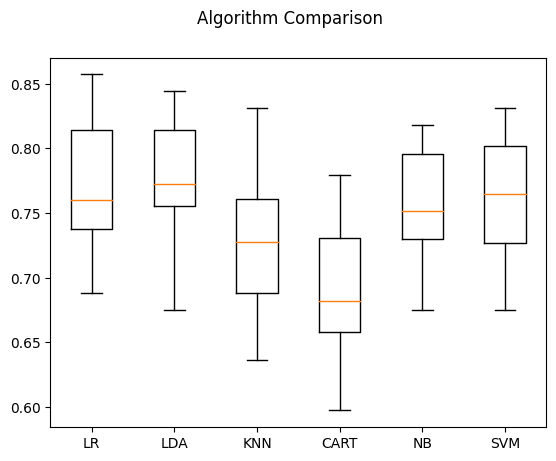

In [13]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values[1:]
X = array[:,0:8]
Y = array[:,8]
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Automating Machine Learning Workflows

#### Data Preparation and Modeling Pipeline

In [15]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
# load data
filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values[1:]
X = array[:,0:8]
Y = array[:,8]
# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda', LinearDiscriminantAnalysis()))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=None)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.773462064251538


### Feature Extraction and Modeling Pipeline

In [18]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
# load data
filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values[1:]
X = array[:,0:8]
Y = array[:,8]
# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression()))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=None)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7773410799726589


## Bagging Algorithms

### Bootstrap Aggregation (or Bagging) involves taking multiple samples from your training dataset (with replacement) and training a model for each sample. The final output prediction is averaged across the predictions of all of the sub-models

- Bagged Decision Trees.
- Random Forest.
- Extra Trees

#### Bagged Decision Trees

In [10]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values[1:]
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=None)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(estimator=cart, n_estimators=num_trees, random_state=None)
results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.7682330827067668


### Random Forest

In [13]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values[1:]
X = array[:,0:8]
Y = array[:,8]
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=None)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7629699248120301


### Extra Trees

In [16]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values[1:]
X = array[:,0:8]
Y = array[:,8]
num_trees = 100
max_features = 7
kfold = KFold(n_splits=10, random_state=None)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7655502392344498


## Boosting Algorithms

- AdaBoost.
- Stochastic Gradient Boosting.

In [18]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values[1:]
X = array[:,0:8]
Y = array[:,8]
num_trees = 30
seed=7
kfold = KFold(n_splits=10, random_state=None)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=None)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.760457963089542


## Stochastic Gradient Boosting

In [23]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values[1:]
X = array[:,0:8]
Y = array[:,8]
seed = 7
num_trees = 100
kfold = KFold(n_splits=10, random_state=None)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=None)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7656185919343814


## Voting Ensemble

In [27]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values[1:]
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=None)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.7617053998632947


## Improve Performance with Algorithm Tuning

#### Grid Search Parameter Tuning

In [30]:
import numpy
from pandas import read_csv
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values[1:]
X = array[:,0:8]
Y = array[:,8]
alphas = numpy.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.27610844129292433
1.0


### Random Search Parameter Tuning

In [35]:
from pandas import read_csv
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values[1:]
X = array[:,0:8]
Y = array[:,8]
param_grid = {'alpha': uniform()}
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100,
random_state=7)
rsearch.fit(X, Y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

0.2761075573402853
0.9779895119966027


### Finalize Your Model with pickle

In [44]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pickle import dump
from pickle import load
filename = 'data/diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values[1:]
X = array[:,0:8]
Y = array[:,8]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# Fit the model on 33%
model = LogisticRegression()
model.fit(X_train, Y_train)
# save the model to disk
filename = 'finalized_model.sav'
dump(model, open(filename, 'wb'))

filename = 'finalized_model.sav'
with open(filename, 'wb') as file:
    dump(model, file)

# Later, you can load the model back
with open(filename, 'rb') as file:
    loaded_model = load(file)
result = loaded_model.score(X_test, Y_test)
print(result)


0.7874015748031497
